<a href="https://colab.research.google.com/github/freebird-9/repo_1/blob/main/Copy_of_BengaluruHomePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

Import Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
blr = pd.read_csv("bengaluru_house_prices.csv")
print(blr[:1])

              area_type availability                  location   size  \
0  Super built-up  Area       19-Dec  Electronic City Phase II  2 BHK   

   society total_sqft  bath  balcony  price  
0  Coomee        1056   2.0      1.0  39.07  


In [124]:
blr.shape

(13320, 9)

In [125]:
blr.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [126]:
blr.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [127]:
blr.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [128]:
blr.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [129]:
blr2 = blr.drop(columns = ['society', 'balcony', 'area_type', 'availability'])

In [130]:
blr2.shape

(13320, 5)

In [131]:
blr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [132]:
blr2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [133]:
blr2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [134]:
blr2.groupby(by = ['location']).count()

,size,total_sqft,bath,price
location,,,,
Anekal,1,1,1,1
Banaswadi,1,1,1,1
Basavangudi,1,1,1,1
Bhoganhalli,1,1,1,1
Devarabeesana Halli,6,6,6,6
...,...,...,...,...
t.c palya,1,1,1,1
tc.palya,4,4,4,4
vinayakanagar,1,1,1,1


In [135]:
blr.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [136]:
blr2.groupby('bath')['bath'].agg('count')

bath
1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

Creating new column BHK that will contain integer value for BHK only. Basically, removing second part of size column and keeping just first part.

In [137]:
blr3 = blr2.dropna()

In [138]:
blr3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [139]:
blr3.shape

(13246, 5)

In [140]:
blr3["BHK"] = blr3["size"].apply(lambda x : int(x.split(' ')[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
blr3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [142]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True


In [143]:
blr3[~blr3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [144]:
def sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None
  

In [145]:
sqft_to_num('2000-3000')

2500.0

In [146]:
blr4 = blr3.copy()
blr4["total_sqft"]= blr4["total_sqft"].apply(sqft_to_num)
blr4.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


Cleaning of location column

In [147]:
blr4["location"] = blr4['location'].apply(lambda x : x.strip())

In [148]:
blr4["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [149]:
stat = blr4.groupby(by = ['location']).count()
stat

,size,total_sqft,bath,price,BHK
location,,,,,
1 Annasandrapalya,1,1,1,1,1
1 Giri Nagar,1,1,1,1,1
1 Immadihalli,1,1,1,1,1
1 Ramamurthy Nagar,1,1,1,1,1
12th cross srinivas nagar banshankari 3rd stage,1,1,1,1,1
...,...,...,...,...,...
t.c palya,1,1,1,1,1
tc.palya,4,4,4,4,4
vinayakanagar,1,1,1,1,1


In [150]:
location_stat = blr4.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_stat
print(location_stat.dtypes)

int64


In [151]:
len(location_stat[location_stat <= 10])

1052

In [152]:
len(blr4.location.unique())

1293

In [153]:
location_stat_less_than_10 = location_stat[location_stat <= 10]
location_stat_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [154]:
blr4['location'] = blr4['location'].apply( lambda x : 'other' if x in location_stat_less_than_10 else x )

In [155]:
len(blr4.location.unique())

242

In [156]:
blr4.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,370.00,6


In [157]:
blr4['price_per_sqft'] = blr4['price']*100000/blr4['total_sqft']
blr4.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Looking Outiers and removing them

Assuming the typical thresold for total square feat per BHK is 300.Lokking at the rows having total_sqft/BHK is less than 300 to find if it looks like outlier/suspicious value.

In [158]:
blr4[blr4.total_sqft/blr4.BHK < 300].head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [159]:
blr4.shape

(13246, 7)

In [160]:
blr5 = blr4[~(blr4.total_sqft/blr4.BHK < 300)]
blr5.shape

(12502, 7)

In [161]:
blr5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

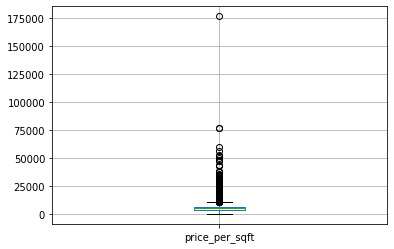

In [162]:
blr5.boxplot(column = ['price_per_sqft'])


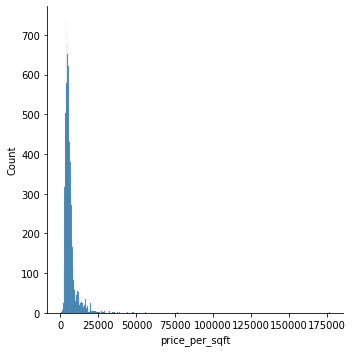

In [163]:
sns.displot(data = blr5, x = 'price_per_sqft')

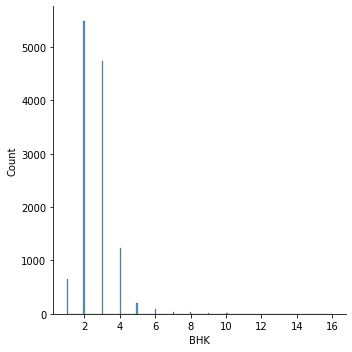

In [164]:
sns.displot(data = blr5, x = 'BHK')

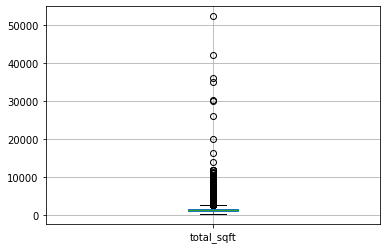

In [165]:
blr5.boxplot(column = ['total_sqft'])


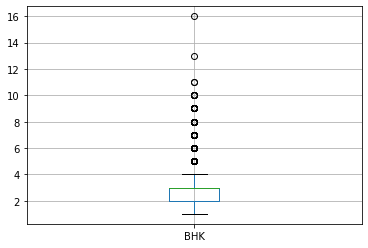

In [166]:
blr5.boxplot(column = ['BHK'])

In [167]:
blr5.shape

(12502, 7)

Finding outliers for price_per_sqft column using z-score 

In [168]:
def remove_pps_outliers(df):
    df_out =pd.DataFrame()
    for key, subdf in df.groupby('location'):
      m = np.mean(subdf.price_per_sqft)
      st = np.std(subdf.price_per_sqft)
      reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
      df_out = pd.concat([df_out,reduced_df], ignore_index = True) 
    return df_out

blr6 = remove_pps_outliers(blr5)  
blr6.shape 

(10241, 7)

In [169]:
blr6.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,1503.877034,2.474075,90.982730,2.572210,5657.702572
std,876.716232,0.981338,86.147549,0.896219,2266.476980
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.762955
50%,1282.000000,2.000000,67.000000,2.000000,5172.413793
75%,1650.000000,3.000000,100.000000,3.000000,6426.099852
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [170]:
blr6.shape

(10241, 7)

In [171]:
blr6['location'].unique().sum()

'1st Block Jayanagar1st Phase JP Nagar2nd Phase Judicial Layout2nd Stage Nagarbhavi5th Block Hbr Layout5th Phase JP Nagar6th Phase JP Nagar7th Phase JP Nagar8th Phase JP Nagar9th Phase JP NagarAECS LayoutAbbigereAkshaya NagarAmbalipuraAmbedkar NagarAmruthahalliAnandapuraAnanth NagarAnekalAnjanapuraArdendaleArekereAttibeleBEML LayoutBTM 2nd StageBTM LayoutBabusapalayaBadavala NagarBalagereBanashankariBanashankari Stage IIBanashankari Stage IIIBanashankari Stage VBanashankari Stage VIBanaswadiBanjara LayoutBannerghattaBannerghatta RoadBasavangudiBasaveshwara NagarBattarahalliBegurBegur RoadBellandurBenson TownBharathi NagarBhoganhalliBillekahalliBinny PeteBisuvanahalliBommanahalliBommasandraBommasandra Industrial AreaBommenahalliBrookefieldBudigereCV Raman NagarChamrajpetChandapuraChannasandraChikka TirupathiChikkabanavarChikkalasandraChoodasandraCooke TownCox TownCunningham RoadDasanapuraDasarahalliDevanahalliDevarachikkanahalliDodda NekkundiDoddaballapurDoddakallasandraDoddathoguruDoml

In [174]:
import matplotlib

Lets plot few scatter plot to look how BHk looks like wrt Total_sqft and price

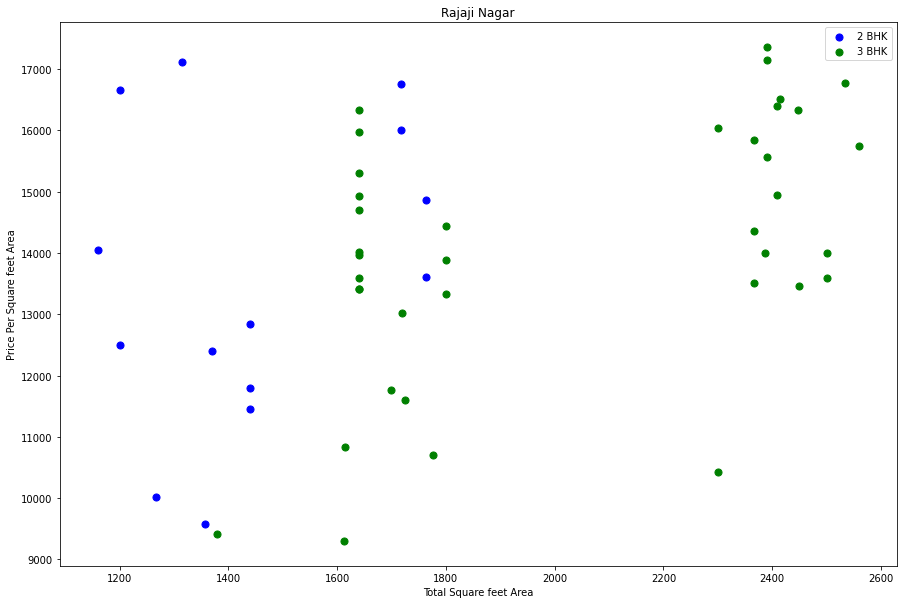

In [176]:
def scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.BHK ==2)]
    bhk3 = df[(df.location == location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, label = '2 BHK', s = 50, color = 'blue')
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, label = '3 BHK', s = 50, color = 'green')
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price Per Square feet Area')
    plt.title(location)
    plt.legend()

scatter_plot(blr6, "Rajaji Nagar")

In [ ]:
sns.scatterplot(data= blr6[(blr6.location=='Rajaji Nagar') & (blr6.BHK== 2)], x= blr6.total_sqft, 

# Splitting dataset